# Introduction

In this notebook we perform the experiments on the robustness of our trained references to data augmentation in spatial space. We import the augmentation methods and apply them to the test sets before running the retrieval algorithm.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dataset import *
from train_abs import *
from test_abs import *
from utils import *

%load_ext autoreload
%autoreload 2

cuda
Loaded util functions


## Import augmentation methods

In [2]:
def shift(x,m=5,n=5):
# up left
    y = np.zeros_like(x)
    y[:-m,:-n] = x[m:,n:]
    return y

def flip(x,ax=1):
    x = np.flip(x, axis = ax)
    return x

def rotate(x,k=1): 
    # k is the number of flip times
    x = np.rot90(x, k, axes=(0, 1))
    return x

In [3]:
# these are the default hyperparameters
n_steps = 50
n_epoch = 5 # we use only 5 epochs
n_train = 32
n_batch = 32
alpha = 1
lr_u = 1
U_range = [0,1]
n_test = 1000

In [4]:
# load datasets
x_train_mnist, x_test_mnist = load_MNIST(32)
x_train_cifar, x_test_cifar = load_CIFAR10(32, channel = -1)
x_train_svhn, x_test_svhn = load_SVHN(32, channel = -1)

# load references, if these references are not available,
# please run 'Reconstruction Using Learned References.ipynb' first 
u_mnist = np.load('./output_abs/20200202_mnist_5_1_32_1_1_50_[0, 1]/u_mnist_32.npy')
u_cifar = np.load('./output_abs/20200202_cifar_5_1_32_1.3_1_50_[0, 1]/u_cifar_32.npy')
u_svhn = np.load('./output_abs/20200202_svhn_10_1_32_1.3_10_50_[0, 1]/u_svhn_32.npy')

Loaded MNIST dataset: x_train(100000, 32, 32), x_valid(140000, 32, 32)
Files already downloaded and verified
Files already downloaded and verified
using Gray image
Loaded CIFAR10 gray dataset: x_train(50000, 32, 32), x_valid(10000, 32, 32)
Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat
using Gray image
Loaded SVHN gray dataset: x_train(73257, 32, 32), x_valid(26032, 32, 32)


# MNIST 

100%|██████████| 32/32 [00:00<00:00, 82.27it/s]


mse 0.00
psnr 59.59
ssim 0.99
mean mse 0.00
psnr of mean 34.01
psnr of mean (mean of psnr) 34.01(59.59)


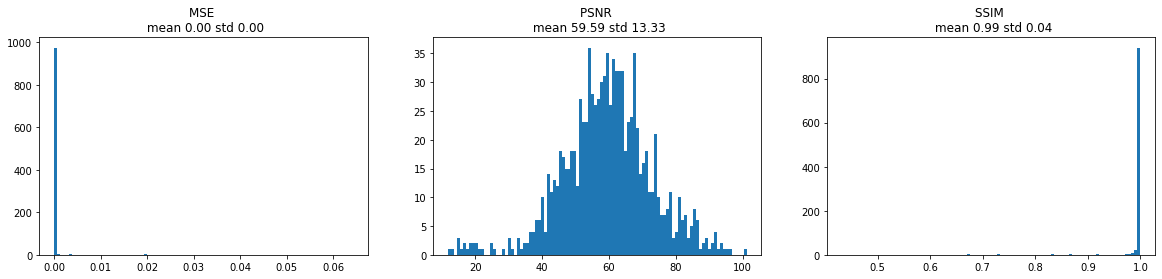

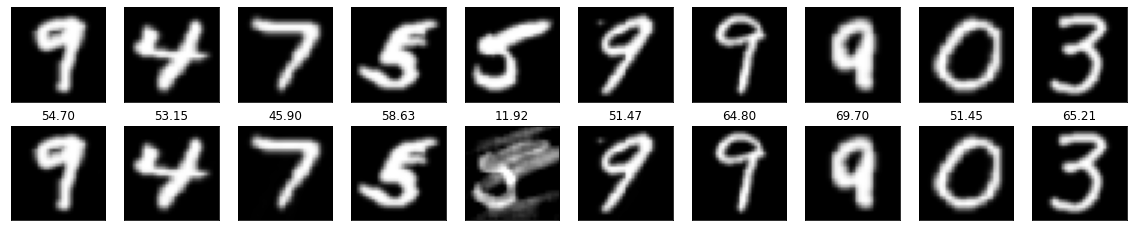

In [5]:
# baseline
x_test_rec_mnist, mse_list_mnist, psnr_list_mnist, ssim_list_mnist = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_mnist,
                                                                              x_test_mnist)

plot_test(x_test_rec_mnist,
          x_test_mnist,
          mse_list_mnist,
          psnr_list_mnist,
          ssim_list_mnist,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.31it/s]


mse 0.00
psnr 60.89
ssim 0.99
mean mse 0.00
psnr of mean 29.00
psnr of mean (mean of psnr) 29.00(60.89)


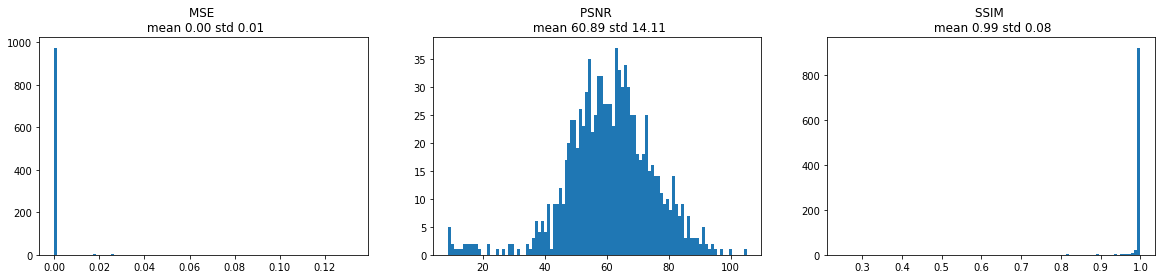

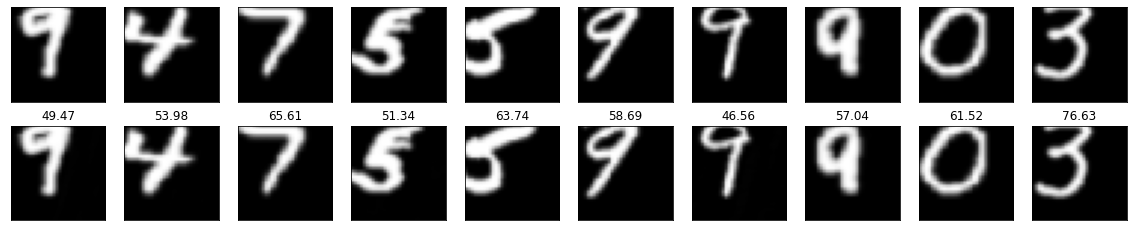

In [6]:
x_test_mnist_shift = np.array([shift(x,5,5) for x in x_test_mnist])

x_test_rec_mnist, mse_list_mnist, psnr_list_mnist, ssim_list_mnist = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_mnist,
                                                                              x_test_mnist_shift)

plot_test(x_test_rec_mnist,
          x_test_mnist_shift,
          mse_list_mnist,
          psnr_list_mnist,
          ssim_list_mnist,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 82.65it/s]


mse 0.00
psnr 49.71
ssim 0.95
mean mse 0.00
psnr of mean 24.24
psnr of mean (mean of psnr) 24.24(49.71)


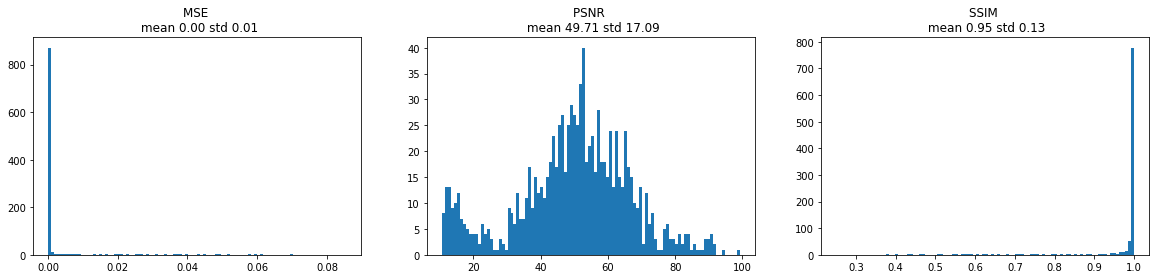

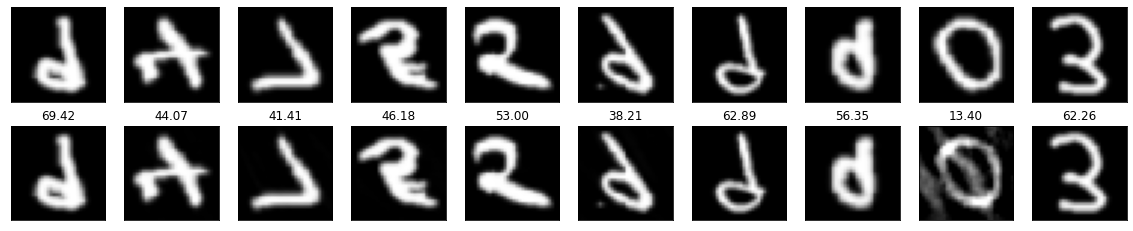

In [7]:
x_test_mnist_flip = np.array([flip(x,0) for x in x_test_mnist])
x_test_rec_mnist, mse_list_mnist, psnr_list_mnist, ssim_list_mnist = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_mnist,
                                                                              x_test_mnist_flip)

plot_test(x_test_rec_mnist,
          x_test_mnist_flip,
          mse_list_mnist,
          psnr_list_mnist,
          ssim_list_mnist,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.63it/s]


mse 0.00
psnr 49.65
ssim 0.95
mean mse 0.00
psnr of mean 25.45
psnr of mean (mean of psnr) 25.45(49.65)


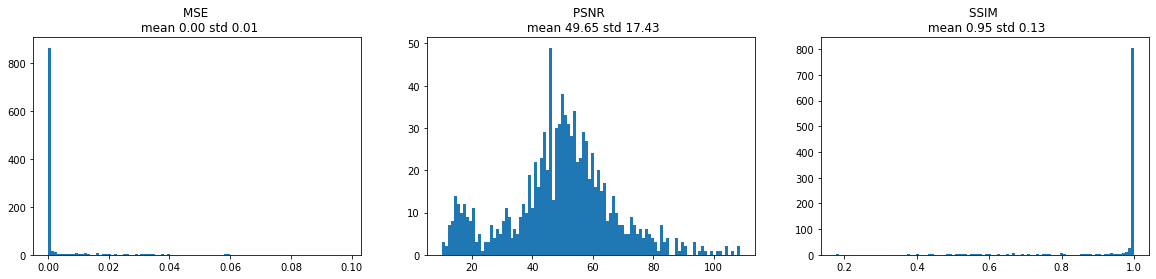

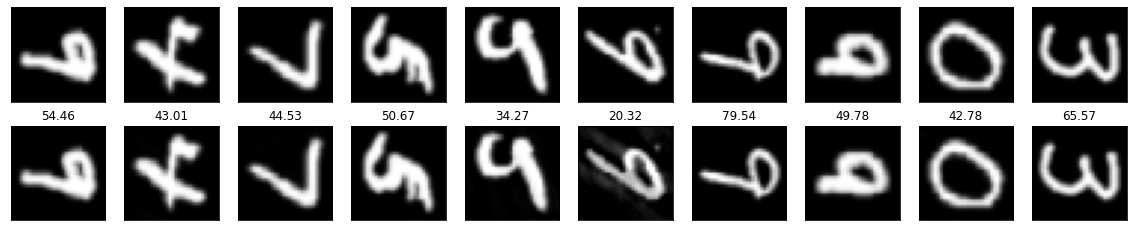

In [8]:
x_test_mnist_rotate = np.array([rotate(x,3) for x in x_test_mnist])

x_test_rec_mnist, mse_list_mnist, psnr_list_mnist, ssim_list_mnist = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_mnist,
                                                                              x_test_mnist_rotate)

plot_test(x_test_rec_mnist,
          x_test_mnist_rotate,
          mse_list_mnist,
          psnr_list_mnist,
          ssim_list_mnist,
          n_test,
          plot_n = 10)

# CIFAR10

100%|██████████| 32/32 [00:00<00:00, 81.84it/s]


mse 0.00
psnr 37.04
ssim 0.97
mean mse 0.00
psnr of mean 27.92
psnr of mean (mean of psnr) 27.92(37.04)


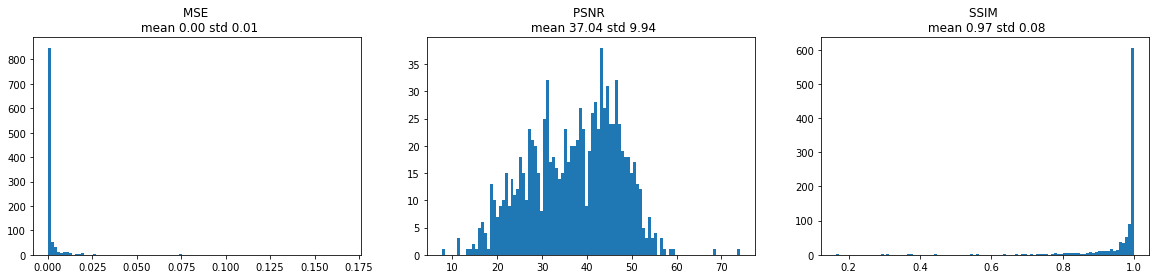

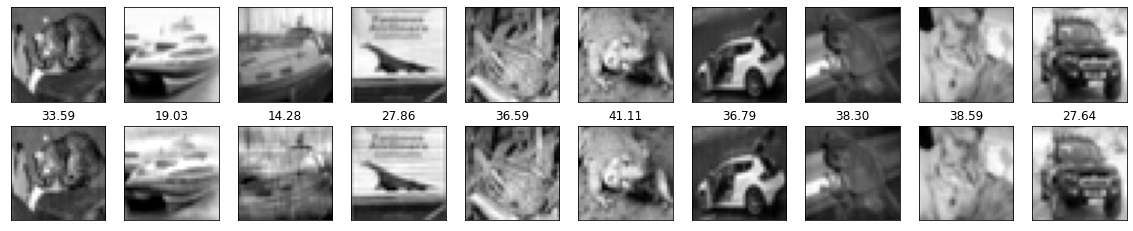

In [9]:
#baseline
x_test_rec_cifar, mse_list_cifar, psnr_list_cifar, ssim_list_cifar = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_cifar,
                                                                              x_test_cifar)

plot_test(x_test_rec_cifar,
          x_test_cifar,
          mse_list_cifar,
          psnr_list_cifar,
          ssim_list_cifar,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.43it/s]


mse 0.00
psnr 26.50
ssim 0.91
mean mse 0.00
psnr of mean 23.59
psnr of mean (mean of psnr) 23.59(26.50)


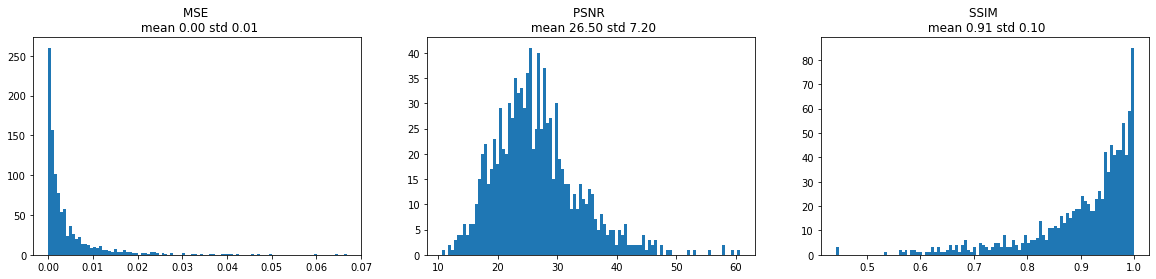

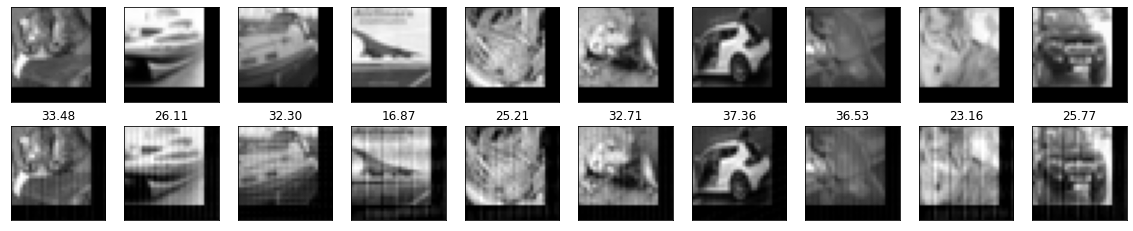

In [10]:
x_test_cifar_shift = np.array([shift(x,5,5) for x in x_test_cifar])

x_test_rec_cifar, mse_list_cifar, psnr_list_cifar, ssim_list_cifar = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_cifar,
                                                                              x_test_cifar_shift)

plot_test(x_test_rec_cifar,
          x_test_cifar_shift,
          mse_list_cifar,
          psnr_list_cifar,
          ssim_list_cifar,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.56it/s]


mse 0.00
psnr 38.08
ssim 0.98
mean mse 0.00
psnr of mean 30.76
psnr of mean (mean of psnr) 30.76(38.08)


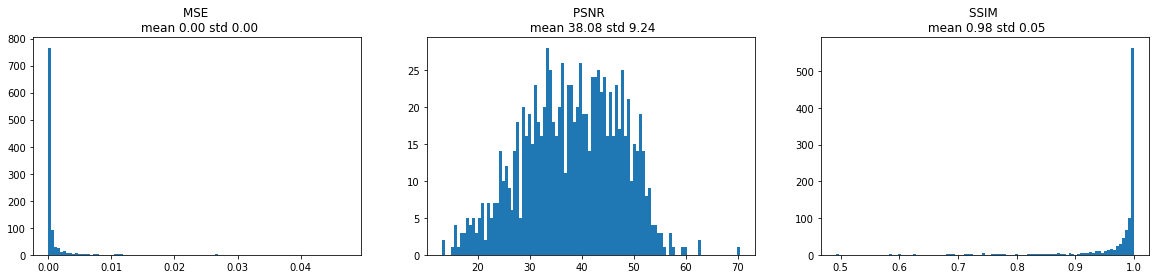

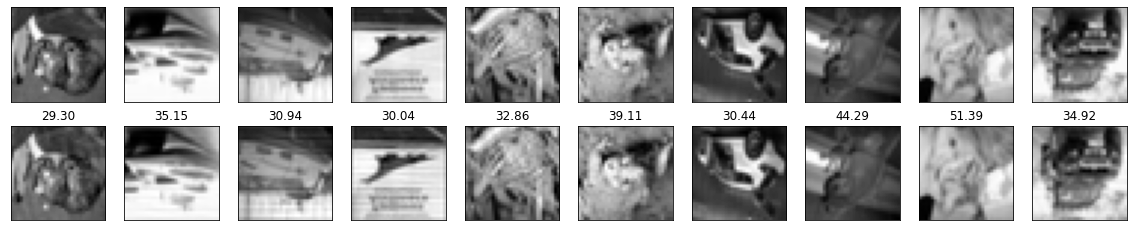

In [11]:
x_test_cifar_flip = np.array([flip(x,0) for x in x_test_cifar])

x_test_rec_cifar, mse_list_cifar, psnr_list_cifar, ssim_list_cifar = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_cifar,
                                                                              x_test_cifar_flip)

plot_test(x_test_rec_cifar,
          x_test_cifar_flip,
          mse_list_cifar,
          psnr_list_cifar,
          ssim_list_cifar,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.64it/s]


mse 0.00
psnr 38.13
ssim 0.97
mean mse 0.00
psnr of mean 27.92
psnr of mean (mean of psnr) 27.92(38.13)


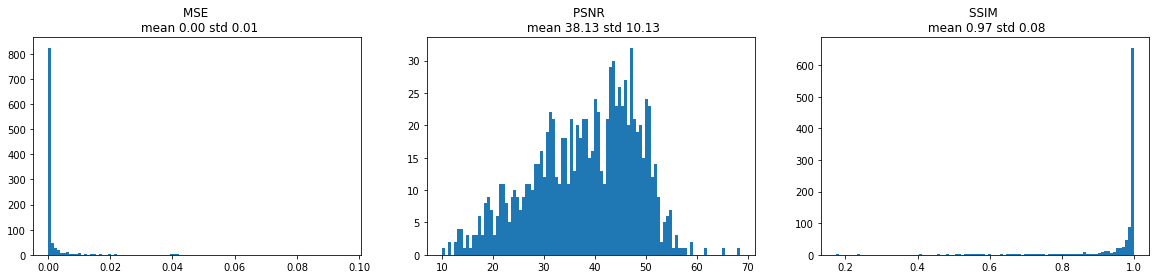

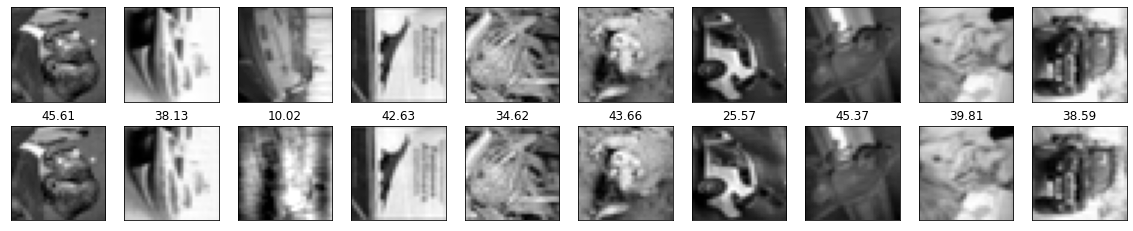

In [12]:
x_test_cifar_rotate = np.array([rotate(x,3) for x in x_test_cifar])

x_test_rec_cifar, mse_list_cifar, psnr_list_cifar, ssim_list_cifar = test_abs(n_test,
                                                                              n_batch,
                                                                              n_steps,
                                                                              alpha,
                                                                              u_cifar,
                                                                              x_test_cifar_rotate)

plot_test(x_test_rec_cifar,
          x_test_cifar_rotate,
          mse_list_cifar,
          psnr_list_cifar,
          ssim_list_cifar,
          n_test,
          plot_n = 10)

# SVHN

100%|██████████| 32/32 [00:00<00:00, 83.53it/s]


mse 0.00
psnr 47.27
ssim 0.99
mean mse 0.00
psnr of mean 35.31
psnr of mean (mean of psnr) 35.31(47.27)


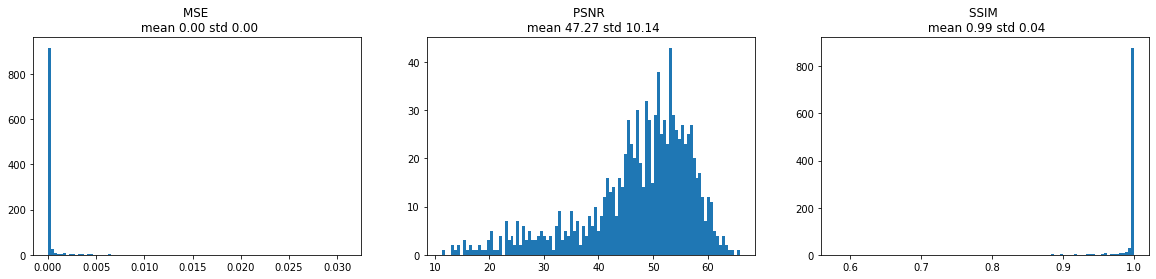

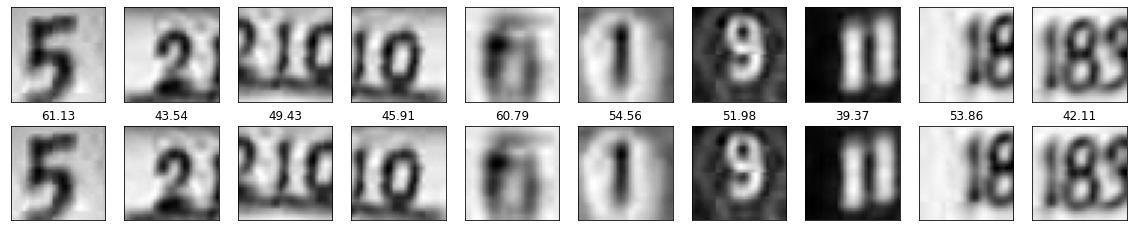

In [13]:
# baseline
x_test_rec_svhn, mse_list_svhn, psnr_list_svhn, ssim_list_svhn = test_abs(n_test,
                                                                          n_batch,
                                                                          n_steps,
                                                                          alpha,
                                                                          u_svhn,
                                                                          x_test_svhn)

plot_test(x_test_rec_svhn,
          x_test_svhn,
          mse_list_svhn,
          psnr_list_svhn,
          ssim_list_svhn,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.53it/s]


mse 0.01
psnr 28.48
ssim 0.89
mean mse 0.01
psnr of mean 22.43
psnr of mean (mean of psnr) 22.43(28.48)


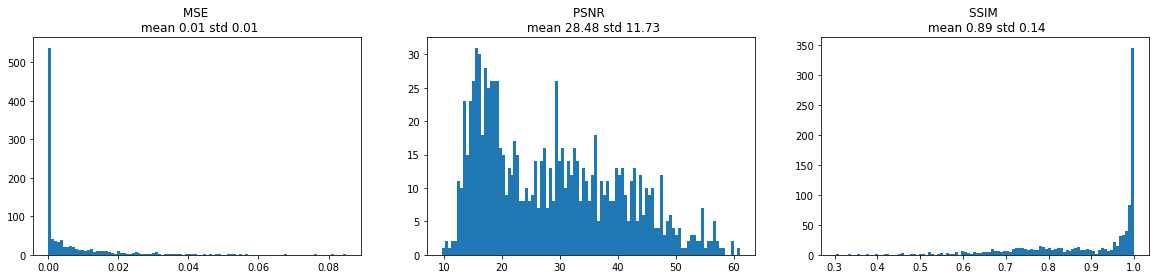

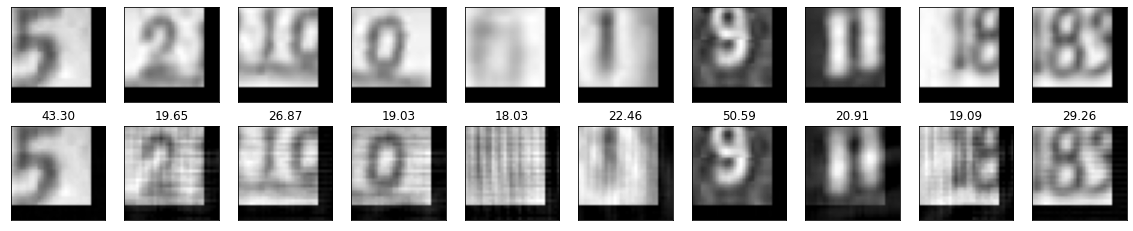

In [14]:
x_test_svhn_shift = np.array([shift(x,5,5) for x in x_test_svhn])

x_test_rec_svhn, mse_list_svhn, psnr_list_svhn, ssim_list_svhn = test_abs(n_test,
                                                                          n_batch,
                                                                          n_steps,
                                                                          alpha,
                                                                          u_svhn,
                                                                          x_test_svhn_shift)

plot_test(x_test_rec_svhn,
          x_test_svhn_shift,
          mse_list_svhn,
          psnr_list_svhn,
          ssim_list_svhn,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.57it/s]


mse 0.00
psnr 47.10
ssim 0.99
mean mse 0.00
psnr of mean 35.55
psnr of mean (mean of psnr) 35.55(47.10)


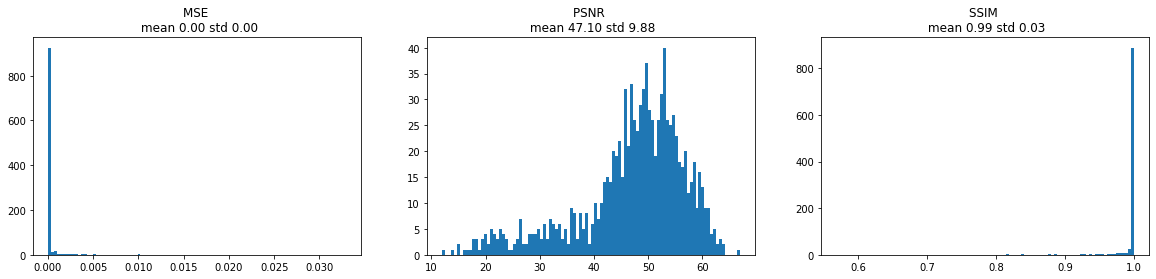

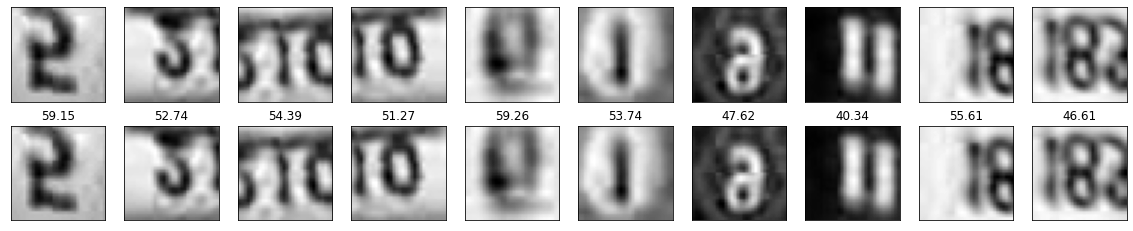

In [15]:
x_test_svhn_flip = np.array([flip(x,0) for x in x_test_svhn])

x_test_rec_svhn, mse_list_svhn, psnr_list_svhn, ssim_list_svhn = test_abs(n_test,
                                                                          n_batch,
                                                                          n_steps,
                                                                          alpha,
                                                                          u_svhn,
                                                                          x_test_svhn_flip)

plot_test(x_test_rec_svhn,
          x_test_svhn_flip,
          mse_list_svhn,
          psnr_list_svhn,
          ssim_list_svhn,
          n_test,
          plot_n = 10)

100%|██████████| 32/32 [00:00<00:00, 83.52it/s]


mse 0.00
psnr 41.18
ssim 0.97
mean mse 0.00
psnr of mean 29.24
psnr of mean (mean of psnr) 29.24(41.18)


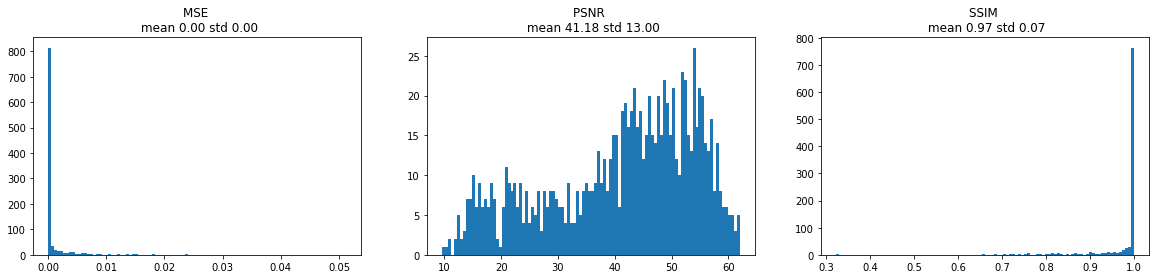

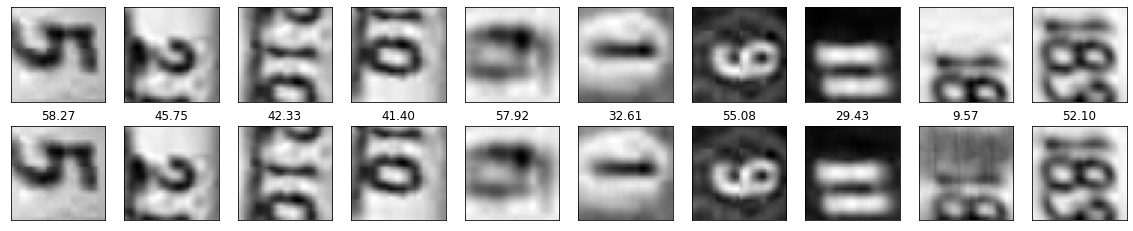

In [16]:
x_test_svhn_rotate = np.array([rotate(x,3) for x in x_test_svhn])

x_test_rec_svhn, mse_list_svhn, psnr_list_svhn, ssim_list_svhn = test_abs(n_test,
                                                                          n_batch,
                                                                          n_steps,
                                                                          alpha,
                                                                          u_svhn,
                                                                          x_test_svhn_rotate)

plot_test(x_test_rec_svhn,
          x_test_svhn_rotate,
          mse_list_svhn,
          psnr_list_svhn,
          ssim_list_svhn,
          n_test,
          plot_n = 10)